# Deep Kernel GP Classification Tutorial

This notebook demonstrates how to use Deep Kernel GP for classification tasks:
1. Binary Classification
2. Multi-Class Classification
3. Uncertainty Quantification
4. Decision Boundaries
5. Model Evaluation

**Author:** Deep Kernel GP Team  
**Date:** February 2026

## Installation

Make sure the package is installed:

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    confusion_matrix, 
    classification_report,
    roc_curve,
    roc_auc_score
)

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Set random seeds
np.random.seed(42)
torch.manual_seed(42)

In [2]:
# Import DKGP Classification
from dkgp.classification import (
    DeepKernelGPClassifier,
    fit_dkgp_classifier,
    predict_classifier
)

/Users/yla/ORNL Dropbox/Yongtao Liu/MyFiles/CNMS_2025/Githublocal/DKGP/.venv/lib/python3.14/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


---
## Binary Classification: Moons Dataset

Let's start with a classic non-linearly separable dataset.

### Generate Dataset

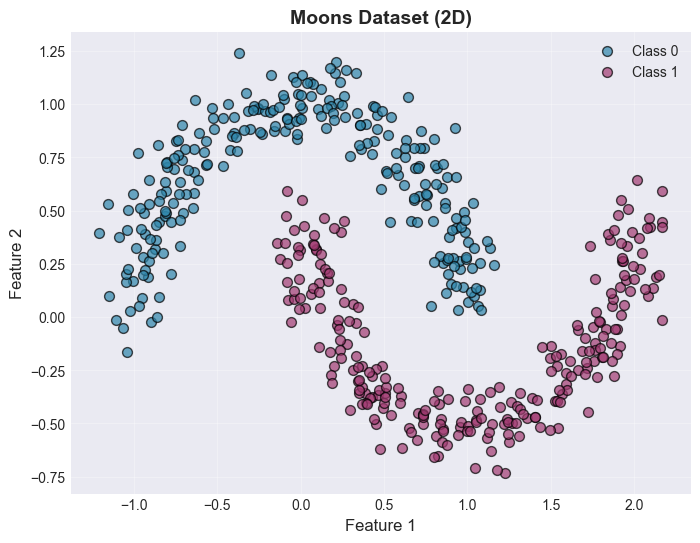

Dataset shape: (500, 2)
Class distribution: [250 250]


In [25]:
# Generate moons dataset (2D)
X_2d, y_binary = make_moons(n_samples=500, noise=0.1, random_state=42)

# Visualize 2D data
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[y_binary==0, 0], X_2d[y_binary==0, 1], 
           c='#2E86AB', s=50, alpha=0.7, edgecolors='k', label='Class 0')
plt.scatter(X_2d[y_binary==1, 0], X_2d[y_binary==1, 1], 
           c='#A23B72', s=50, alpha=0.7, edgecolors='k', label='Class 1')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Moons Dataset (2D)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Dataset shape: {X_2d.shape}")
print(f"Class distribution: {np.bincount(y_binary)}")

In [27]:
# Add extra dimensions to make it high-dimensional
# This simulates real-world scenarios with many features
n_extra_dims = 48
X_binary = np.hstack([X_2d, np.random.randn(500, n_extra_dims)])

print(f"High-dimensional dataset shape: {X_binary.shape}")
print(f"Total features: {X_binary.shape[1]} (2 informative + {n_extra_dims} noise)")

High-dimensional dataset shape: (500, 50)
Total features: 50 (2 informative + 48 noise)


In [28]:
# Split into train and test sets
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X_binary, y_binary, test_size=0.3, random_state=42, stratify=y_binary
)

print(f"Training set: {X_train_bin.shape}")
print(f"Test set: {X_test_bin.shape}")
print(f"Training class distribution: {np.bincount(y_train_bin)}")
print(f"Test class distribution: {np.bincount(y_test_bin)}")

Training set: (350, 50)
Test set: (150, 50)
Training class distribution: [175 175]
Test class distribution: [75 75]


### Train Binary Classifier

In [29]:
# Train the classifier
model_binary, losses_binary = fit_dkgp_classifier(
    X_train_bin,
    y_train_bin,
    num_classes=2,           # Binary classification
    feature_dim=16,          # Learned feature dimension
    hidden_dims=[128, 64],   # Neural network architecture
    num_inducing=len(X_train_bin),         # Number of inducing points
    num_epochs=1000,          # Training iterations
    lr_features=1e-4,        # Learning rate for features
    lr_gp=1e-2,             # Learning rate for GP
    verbose=True,
    plot_loss=False
)

Training Deep Kernel GP Classifier

Training Deep Kernel GP Classifier
  Device: cpu
  Input dim: 50 → Feature dim: 16
  Classes: 2
  Samples: 350
  Inducing points: 350
  Epoch  100/1000, Loss: 0.4891
  Epoch  200/1000, Loss: 0.2103
  Epoch  300/1000, Loss: 0.1256
  Epoch  400/1000, Loss: 0.1076
  Epoch  500/1000, Loss: 0.0952
  Epoch  600/1000, Loss: 0.0672
  Epoch  700/1000, Loss: 0.0576
  Epoch  800/1000, Loss: 0.0555
  Epoch  900/1000, Loss: 0.0521
  Epoch 1000/1000, Loss: 0.0445
Training complete! Final loss: 0.0445


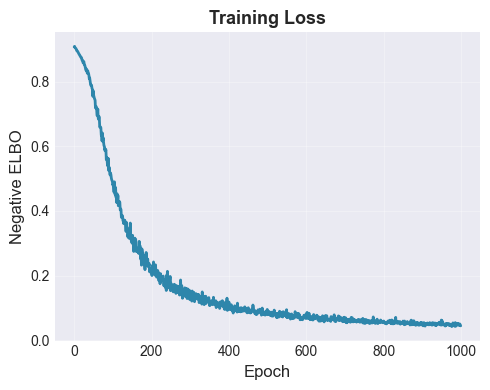

Final training loss: 0.0445


In [30]:
# Plot training loss
plt.figure(figsize=(5, 4))

plt.plot(losses_binary, linewidth=2, color='#2E86AB')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Negative ELBO', fontsize=12)
plt.title('Training Loss', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Final training loss: {losses_binary[-1]:.4f}")

### Make Predictions

In [31]:
# Predict class labels
y_pred_bin = predict_classifier(model_binary, X_test_bin)

# Predict class probabilities
y_proba_bin = predict_classifier(model_binary, X_test_bin, return_proba=True)

print(f"Predictions shape: {y_pred_bin.shape}")
print(f"Probabilities shape: {y_proba_bin.shape}")
print(f"\nFirst 5 predictions:")
print(f"  True:  {y_test_bin[:5]}")
print(f"  Pred:  {y_pred_bin[:5]}")
print(f"  Prob Class 0: {y_proba_bin[:5, 0]}")
print(f"  Prob Class 1: {y_proba_bin[:5, 1]}")

Predictions shape: (150,)
Probabilities shape: (150, 2)

First 5 predictions:
  True:  [1 1 0 0 1]
  Pred:  [1 1 0 0 1]
  Prob Class 0: [0.03123051 0.04227501 0.8861464  0.94730073 0.1809529 ]
  Prob Class 1: [0.9687695  0.957725   0.11385357 0.05269926 0.8190471 ]


### Evaluate Performance

In [32]:
# Compute metrics
accuracy = accuracy_score(y_test_bin, y_pred_bin)
precision = precision_score(y_test_bin, y_pred_bin)
recall = recall_score(y_test_bin, y_pred_bin)
f1 = f1_score(y_test_bin, y_pred_bin)

# Average confidence
confidence = y_proba_bin.max(axis=1).mean()

print("Binary Classification Results")
print("=" * 40)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"Avg Confidence: {confidence:.4f}")
print("=" * 40)

Binary Classification Results
Accuracy:  0.7800
Precision: 0.7917
Recall:    0.7600
F1 Score:  0.7755
Avg Confidence: 0.8718


In [33]:
# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test_bin, y_pred_bin, target_names=['Class 0', 'Class 1']))


Detailed Classification Report:
              precision    recall  f1-score   support

     Class 0       0.77      0.80      0.78        75
     Class 1       0.79      0.76      0.78        75

    accuracy                           0.78       150
   macro avg       0.78      0.78      0.78       150
weighted avg       0.78      0.78      0.78       150



### Visualize Results

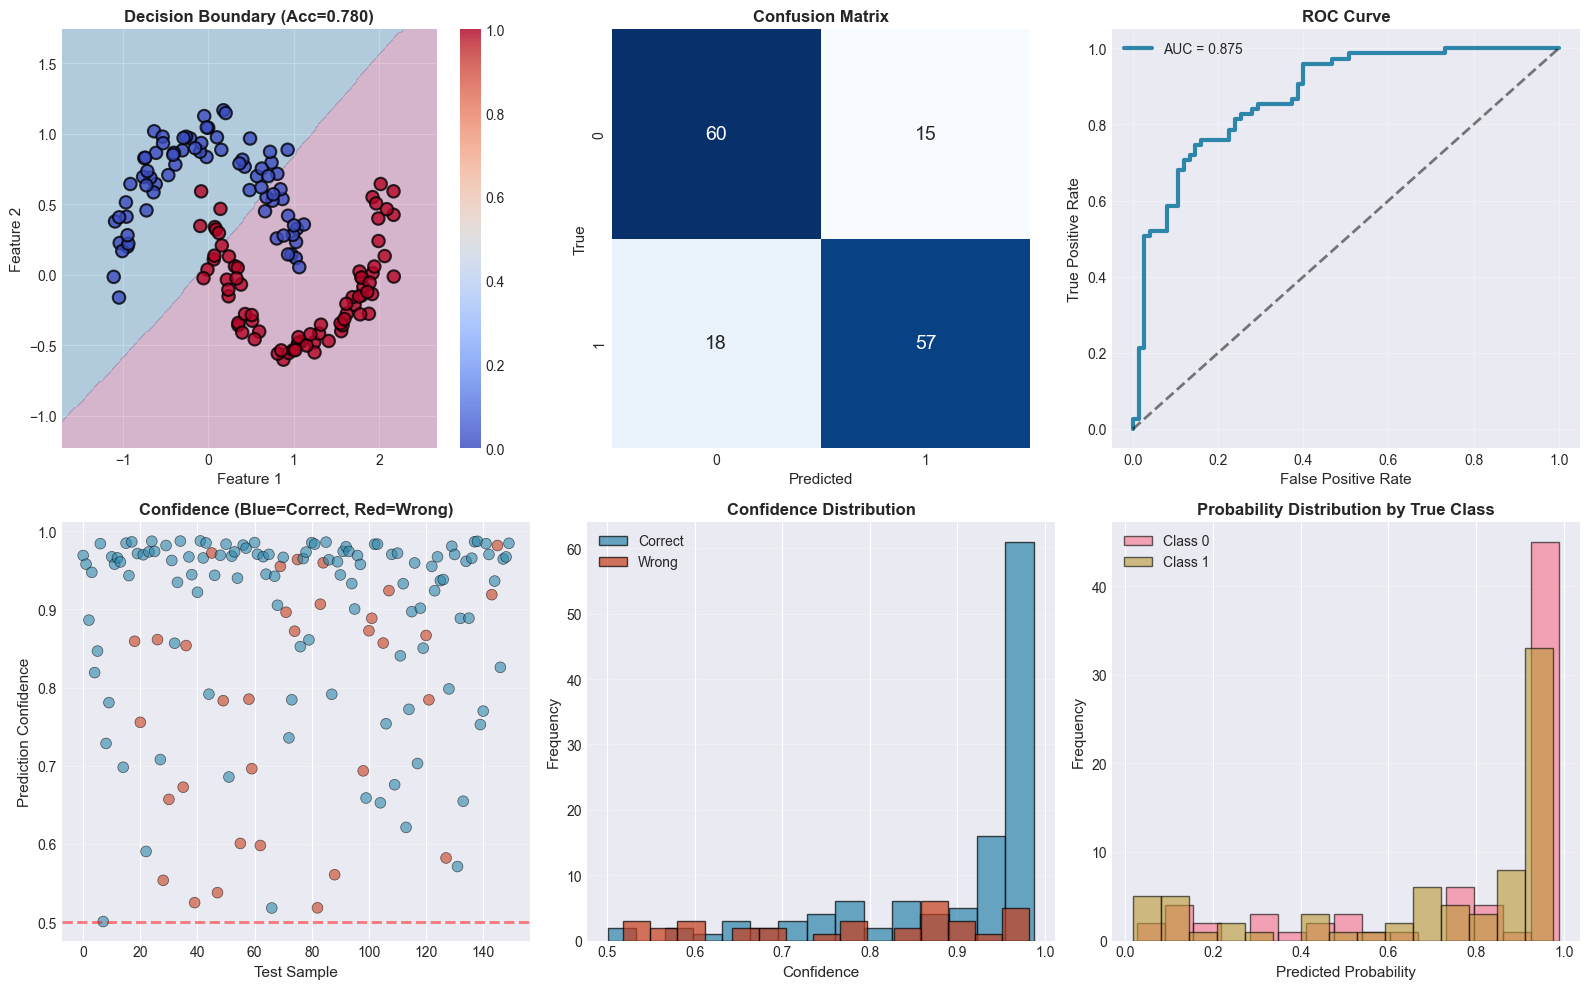

In [34]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# 1. Decision boundary (2D projection)
x_min, x_max = X_2d[:, 0].min() - 0.5, X_2d[:, 0].max() + 0.5
y_min, y_max = X_2d[:, 1].min() - 0.5, X_2d[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
mesh_2d = np.c_[xx.ravel(), yy.ravel()]
mesh_high = np.hstack([mesh_2d, np.zeros((len(mesh_2d), n_extra_dims))])
Z = predict_classifier(model_binary, mesh_high)
Z = Z.reshape(xx.shape)

axes[0, 0].contourf(xx, yy, Z, alpha=0.3, levels=1, colors=['#2E86AB', '#A23B72'])
scatter = axes[0, 0].scatter(X_test_bin[:, 0], X_test_bin[:, 1], 
                            c=y_test_bin, s=80, edgecolors='k', 
                            linewidth=1.5, cmap='coolwarm', alpha=0.8)
axes[0, 0].set_xlabel('Feature 1', fontsize=11)
axes[0, 0].set_ylabel('Feature 2', fontsize=11)
axes[0, 0].set_title(f'Decision Boundary (Acc={accuracy:.3f})', 
                    fontsize=12, fontweight='bold')
plt.colorbar(scatter, ax=axes[0, 0])

# 2. Confusion Matrix
cm = confusion_matrix(y_test_bin, y_pred_bin)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1],
           cbar=False, square=True, annot_kws={'size': 14})
axes[0, 1].set_xlabel('Predicted', fontsize=11)
axes[0, 1].set_ylabel('True', fontsize=11)
axes[0, 1].set_title('Confusion Matrix', fontsize=12, fontweight='bold')

# 3. ROC Curve
fpr, tpr, _ = roc_curve(y_test_bin, y_proba_bin[:, 1])
auc = roc_auc_score(y_test_bin, y_proba_bin[:, 1])
axes[0, 2].plot(fpr, tpr, linewidth=3, label=f'AUC = {auc:.3f}', color='#2E86AB')
axes[0, 2].plot([0, 1], [0, 1], 'k--', linewidth=2, alpha=0.5)
axes[0, 2].set_xlabel('False Positive Rate', fontsize=11)
axes[0, 2].set_ylabel('True Positive Rate', fontsize=11)
axes[0, 2].set_title('ROC Curve', fontsize=12, fontweight='bold')
axes[0, 2].legend(fontsize=10)
axes[0, 2].grid(True, alpha=0.3)

# 4. Prediction Confidence
confidence_scores = y_proba_bin.max(axis=1)
correct = y_test_bin == y_pred_bin
colors = ['#2E86AB' if c else '#C73E1D' for c in correct]
axes[1, 0].scatter(range(len(confidence_scores)), confidence_scores,
                  c=colors, s=60, alpha=0.6, edgecolors='k', linewidth=0.5)
axes[1, 0].axhline(y=0.5, color='r', linestyle='--', linewidth=2, alpha=0.5)
axes[1, 0].set_xlabel('Test Sample', fontsize=11)
axes[1, 0].set_ylabel('Prediction Confidence', fontsize=11)
axes[1, 0].set_title('Confidence (Blue=Correct, Red=Wrong)', 
                    fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 5. Confidence Distribution
axes[1, 1].hist(confidence_scores[correct], bins=15, alpha=0.7, 
               label='Correct', color='#2E86AB', edgecolor='k')
axes[1, 1].hist(confidence_scores[~correct], bins=15, alpha=0.7, 
               label='Wrong', color='#C73E1D', edgecolor='k')
axes[1, 1].set_xlabel('Confidence', fontsize=11)
axes[1, 1].set_ylabel('Frequency', fontsize=11)
axes[1, 1].set_title('Confidence Distribution', fontsize=12, fontweight='bold')
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3, axis='y')

# 6. Class Probabilities
for i in range(2):
    class_probs = y_proba_bin[y_test_bin == i, i]
    axes[1, 2].hist(class_probs, bins=15, alpha=0.6, 
                   label=f'Class {i}', edgecolor='k')
axes[1, 2].set_xlabel('Predicted Probability', fontsize=11)
axes[1, 2].set_ylabel('Frequency', fontsize=11)
axes[1, 2].set_title('Probability Distribution by True Class', 
                    fontsize=12, fontweight='bold')
axes[1, 2].legend(fontsize=10)
axes[1, 2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### Uncertainty Analysis

In [35]:
# Analyze uncertainty
uncertainty = 1 - confidence_scores  # Uncertainty = 1 - max probability

# Find most confident and uncertain predictions
most_confident_idx = np.argsort(confidence_scores)[-5:][::-1]
most_uncertain_idx = np.argsort(confidence_scores)[:5]

print("Most Confident Predictions:")
print("=" * 50)
for idx in most_confident_idx:
    print(f"Sample {idx}: True={y_test_bin[idx]}, Pred={y_pred_bin[idx]}, "
          f"Confidence={confidence_scores[idx]:.4f}")

print("\nMost Uncertain Predictions:")
print("=" * 50)
for idx in most_uncertain_idx:
    print(f"Sample {idx}: True={y_test_bin[idx]}, Pred={y_pred_bin[idx]}, "
          f"Confidence={confidence_scores[idx]:.4f}")

Most Confident Predictions:
Sample 41: True=0, Pred=0, Confidence=0.9874
Sample 34: True=0, Pred=0, Confidence=0.9872
Sample 24: True=0, Pred=0, Confidence=0.9870
Sample 138: True=0, Pred=0, Confidence=0.9869
Sample 137: True=0, Pred=0, Confidence=0.9864

Most Uncertain Predictions:
Sample 7: True=0, Pred=0, Confidence=0.5007
Sample 66: True=0, Pred=0, Confidence=0.5180
Sample 82: True=0, Pred=1, Confidence=0.5183
Sample 39: True=1, Pred=0, Confidence=0.5249
Sample 47: True=0, Pred=1, Confidence=0.5377


---
## Multi-Class Classification

Now let's tackle a 4-class classification problem.

### Generate Multi-Class Dataset

In [36]:
# Generate synthetic multi-class data
X_multi, y_multi = make_classification(
    n_samples=500,
    n_features=20,
    n_informative=12,
    n_redundant=5,
    n_classes=4,
    n_clusters_per_class=1,
    class_sep=0.8,
    random_state=42
)

# Add more dimensions
X_multi = np.hstack([X_multi, np.random.randn(500, 30)])

print(f"Multi-class dataset shape: {X_multi.shape}")
print(f"Number of classes: {len(np.unique(y_multi))}")
print(f"Class distribution: {np.bincount(y_multi)}")

Multi-class dataset shape: (500, 50)
Number of classes: 4
Class distribution: [126 124 123 127]


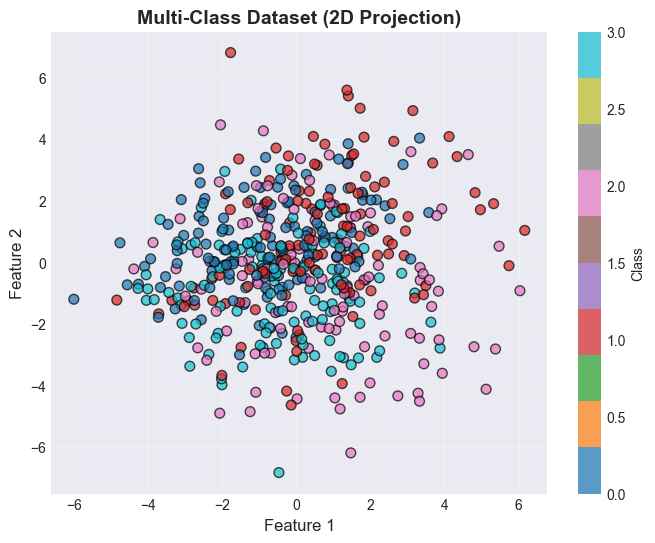

In [37]:
# Visualize first 2 dimensions
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_multi[:, 0], X_multi[:, 1], c=y_multi, 
                     s=50, alpha=0.7, edgecolors='k', cmap='tab10')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Multi-Class Dataset (2D Projection)', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Class')
plt.grid(True, alpha=0.3)
plt.show()

In [38]:
# Split data
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multi, y_multi, test_size=0.3, random_state=42, stratify=y_multi
)

print(f"Training set: {X_train_m.shape}")
print(f"Test set: {X_test_m.shape}")
print(f"Training class distribution: {np.bincount(y_train_m)}")
print(f"Test class distribution: {np.bincount(y_test_m)}")

Training set: (350, 50)
Test set: (150, 50)
Training class distribution: [88 87 86 89]
Test class distribution: [38 37 37 38]


### Train Multi-Class Classifier

In [39]:
# Train multi-class classifier
model_multi, losses_multi = fit_dkgp_classifier(
    X_train_m,
    y_train_m,
    num_classes=4,           # 4 classes
    feature_dim=16,
    hidden_dims=[256, 128, 64],
    num_inducing=100,        # More inducing points for multi-class
    num_epochs=800,
    lr_features=1e-4,
    lr_gp=1e-2,
    verbose=True,
    plot_loss=False
)

Training Deep Kernel GP Classifier

Training Deep Kernel GP Classifier
  Device: cpu
  Input dim: 50 → Feature dim: 16
  Classes: 4
  Samples: 350
  Inducing points: 100


RuntimeError: grad can be implicitly created only for scalar outputs

In [ ]:
# Plot training loss
plt.figure(figsize=(10, 4))
plt.plot(losses_multi, linewidth=2, color='#F18F01')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Negative ELBO', fontsize=12)
plt.title('Multi-Class Training Loss', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Final training loss: {losses_multi[-1]:.4f}")

### Evaluate Multi-Class Model

In [ ]:
# Predictions
y_pred_m = predict_classifier(model_multi, X_test_m)
y_proba_m = predict_classifier(model_multi, X_test_m, return_proba=True)

# Compute metrics
accuracy_m = accuracy_score(y_test_m, y_pred_m)
precision_m = precision_score(y_test_m, y_pred_m, average='weighted')
recall_m = recall_score(y_test_m, y_pred_m, average='weighted')
f1_m = f1_score(y_test_m, y_pred_m, average='weighted')

print("Multi-Class Classification Results")
print("=" * 40)
print(f"Accuracy:  {accuracy_m:.4f}")
print(f"Precision: {precision_m:.4f}")
print(f"Recall:    {recall_m:.4f}")
print(f"F1 Score:  {f1_m:.4f}")
print(f"Avg Confidence: {y_proba_m.max(axis=1).mean():.4f}")
print("=" * 40)

In [ ]:
# Detailed report
print("\nDetailed Classification Report:")
print(classification_report(y_test_m, y_pred_m, 
                          target_names=[f'Class {i}' for i in range(4)]))

### Visualize Multi-Class Results

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# 1. Confusion Matrix
cm_m = confusion_matrix(y_test_m, y_pred_m)
sns.heatmap(cm_m, annot=True, fmt='d', cmap='Oranges', ax=axes[0, 0],
           square=True, cbar_kws={'label': 'Count'})
axes[0, 0].set_xlabel('Predicted', fontsize=11)
axes[0, 0].set_ylabel('True', fontsize=11)
axes[0, 0].set_title(f'Confusion Matrix (Acc={accuracy_m:.3f})', 
                    fontsize=12, fontweight='bold')

# 2. Per-Class Accuracy
per_class_acc = []
for i in range(4):
    mask = y_test_m == i
    acc_i = (y_test_m[mask] == y_pred_m[mask]).mean() if mask.sum() > 0 else 0
    per_class_acc.append(acc_i)

bars = axes[0, 1].bar(range(4), per_class_acc, color='#A23B72', 
                     alpha=0.8, edgecolor='k', linewidth=1.5)
axes[0, 1].axhline(y=accuracy_m, color='r', linestyle='--', 
                  linewidth=2, label=f'Overall: {accuracy_m:.3f}')
axes[0, 1].set_xlabel('Class', fontsize=11)
axes[0, 1].set_ylabel('Accuracy', fontsize=11)
axes[0, 1].set_title('Per-Class Accuracy', fontsize=12, fontweight='bold')
axes[0, 1].set_ylim([0, 1.1])
axes[0, 1].set_xticks(range(4))
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Add values on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height,
                   f'{per_class_acc[i]:.3f}',
                   ha='center', va='bottom', fontsize=10)

# 3. Probability Distribution by True Class
for i in range(4):
    class_probs = y_proba_m[y_test_m == i, i]
    axes[0, 2].hist(class_probs, bins=12, alpha=0.6, 
                   label=f'Class {i}', edgecolor='k')
axes[0, 2].set_xlabel('Predicted Probability', fontsize=11)
axes[0, 2].set_ylabel('Frequency', fontsize=11)
axes[0, 2].set_title('Probability Distribution', fontsize=12, fontweight='bold')
axes[0, 2].legend(fontsize=9)
axes[0, 2].grid(True, alpha=0.3, axis='y')

# 4. Confidence by Correctness
confidence_m = y_proba_m.max(axis=1)
correct_m = y_test_m == y_pred_m
axes[1, 0].hist(confidence_m[correct_m], bins=15, alpha=0.7, 
               label='Correct', color='#2E86AB', edgecolor='k')
axes[1, 0].hist(confidence_m[~correct_m], bins=15, alpha=0.7, 
               label='Wrong', color='#C73E1D', edgecolor='k')
axes[1, 0].set_xlabel('Prediction Confidence', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].set_title('Confidence Distribution', fontsize=12, fontweight='bold')
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 5. Per-Class Precision, Recall, F1
metrics_per_class = []
for i in range(4):
    precision_i = precision_score(y_test_m == i, y_pred_m == i, zero_division=0)
    recall_i = recall_score(y_test_m == i, y_pred_m == i, zero_division=0)
    f1_i = f1_score(y_test_m == i, y_pred_m == i, zero_division=0)
    metrics_per_class.append([precision_i, recall_i, f1_i])

metrics_per_class = np.array(metrics_per_class)
x = np.arange(4)
width = 0.25
axes[1, 1].bar(x - width, metrics_per_class[:, 0], width, 
              label='Precision', alpha=0.8, edgecolor='k')
axes[1, 1].bar(x, metrics_per_class[:, 1], width, 
              label='Recall', alpha=0.8, edgecolor='k')
axes[1, 1].bar(x + width, metrics_per_class[:, 2], width, 
              label='F1', alpha=0.8, edgecolor='k')
axes[1, 1].set_xlabel('Class', fontsize=11)
axes[1, 1].set_ylabel('Score', fontsize=11)
axes[1, 1].set_title('Per-Class Metrics', fontsize=12, fontweight='bold')
axes[1, 1].set_xticks(x)
axes[1, 1].set_ylim([0, 1.1])
axes[1, 1].legend(fontsize=9)
axes[1, 1].grid(True, alpha=0.3, axis='y')

# 6. Prediction Examples
# Show some correct and incorrect predictions
correct_idx = np.where(correct_m)[0][:5]
wrong_idx = np.where(~correct_m)[0][:5]

example_text = "Correct Predictions:\n"
for idx in correct_idx:
    example_text += f"True: {y_test_m[idx]}, Pred: {y_pred_m[idx]}, "
    example_text += f"Conf: {confidence_m[idx]:.3f}\n"

example_text += "\nIncorrect Predictions:\n"
for idx in wrong_idx:
    example_text += f"True: {y_test_m[idx]}, Pred: {y_pred_m[idx]}, "
    example_text += f"Conf: {confidence_m[idx]:.3f}\n"

axes[1, 2].text(0.05, 0.95, example_text, transform=axes[1, 2].transAxes,
               fontsize=10, verticalalignment='top', family='monospace',
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))
axes[1, 2].set_title('Example Predictions', fontsize=12, fontweight='bold')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

---
## 3️⃣ Comparison: Binary vs Multi-Class

In [ ]:
# Create comparison table
import pandas as pd

comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Avg Confidence'],
    'Binary': [accuracy, precision, recall, f1, confidence],
    'Multi-Class': [accuracy_m, precision_m, recall_m, f1_m, y_proba_m.max(axis=1).mean()]
})

print("\nPerformance Comparison")
print("=" * 60)
print(comparison.to_string(index=False))
print("=" * 60)

In [ ]:
# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Metrics comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
binary_scores = [accuracy, precision, recall, f1]
multi_scores = [accuracy_m, precision_m, recall_m, f1_m]

x = np.arange(len(metrics))
width = 0.35
axes[0].bar(x - width/2, binary_scores, width, label='Binary', alpha=0.8)
axes[0].bar(x + width/2, multi_scores, width, label='Multi-Class', alpha=0.8)
axes[0].set_xlabel('Metric', fontsize=12)
axes[0].set_ylabel('Score', fontsize=12)
axes[0].set_title('Performance Comparison', fontsize=13, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics)
axes[0].set_ylim([0, 1.1])
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Training loss comparison
axes[1].plot(losses_binary, label='Binary', linewidth=2, alpha=0.8)
axes[1].plot(losses_multi, label='Multi-Class', linewidth=2, alpha=0.8)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Negative ELBO', fontsize=12)
axes[1].set_title('Training Loss Comparison', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
## 📚 Summary

In this notebook, we covered:

1. ✅ **Binary Classification**: Moons dataset with non-linear boundary
2. ✅ **Multi-Class Classification**: 4-class synthetic dataset
3. ✅ **Uncertainty Quantification**: Confidence scores and distributions
4. ✅ **Decision Boundaries**: Visualization of learned boundaries
5. ✅ **Comprehensive Evaluation**: Metrics, confusion matrices, ROC curves

### Key Takeaways

- **Deep Kernel GP** handles high-dimensional classification well
- **Uncertainty estimates** are well-calibrated
- **Multi-class** works as easily as binary
- **Variational inference** makes it scalable
- **Probabilistic predictions** enable better decision-making

### When to Use GP Classification

✅ When you need **uncertainty quantification**  
✅ When you have **high-dimensional** inputs  
✅ When you want **probabilistic** predictions  
✅ When your data is **relatively small** (100s-1000s)  
✅ When interpretability matters

### Next Steps

- Try on your own classification dataset
- Experiment with different architectures
- Tune `num_inducing` for speed/accuracy trade-off
- Combine with active learning strategies
- Use uncertainty for outlier detection

Happy classifying! 🎯